# ASI assessed exercise 2015/2016

## Exercise 1
#### Download the red and white wine .csv files and import them. 

In [ ]:
import pandas as pd
import sys
red_wine = pd.read_csv('winequality-red.csv', sep = ';')
white_wine = pd.read_csv('winequality-white.csv', sep = ';')

## Exercise 2
#### Plot bar-plots of the number of examples with each target value for the two datasets.

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline 
red_wine.groupby('quality').count()['fixed acidity'].plot(kind='bar')
plt.xlabel("Target value") 
plt.ylabel("Number")
plt.title('Figure 1: The number of examples for each target value for red wine')
plt.grid(True,which="both",ls="-")
plt.show()

white_wine.groupby('quality').count()['fixed acidity'].plot(kind='bar')
plt.xlabel("Target value")
plt.ylabel("Number")
plt.title('Figure 2: The number of examples for each target value for white wine')
plt.grid(True,which="both",ls="-")
plt.show()

## Exercise 3
#### Comment on these distributions. How might they effect the analysis?

This ditributions look a lot like normal distributions. The datas which have a quality of 5 6 and 7 will be easy to find because there is a lot of data in this range, but the datas with a quality of 3,4 or 8 will be harder to find.

## Exercise 4 - Linear regression
#### (a) We will now concentrate on the red wine data. Randomly split the data into a training and test set with 70% of the examples in the training and 30% in the test

In [3]:
import random
splitData = int(70/100*len(red_wine))
index = []
for k in range(len(red_wine)):
    index.append(k)
random.shuffle(index)
train_index = index[:splitData]
test_index = index[splitData:]

In [4]:
train_data = red_wine.iloc[train_index].sort_index()
test_data = red_wine.iloc[test_index].sort_index()

#### (b) Fit a linear regression to the training data

In [5]:
import numpy as np
#create X
X = np.eye(len(train_data), 12)
for k in range(len(train_data)) :
    X[k][0] = 1
k=1
train_index.sort()
for column in train_data :
    if column != 'quality' :
        for line in range(len(train_data)):
            X[line][k] = train_data[column][train_index[line]]
        k=k+1

In [6]:
#create t
t=np.eye(len(train_data), 1)
for line in range(len(train_data)):
            t[line][0] = train_data['quality'][train_index[line]]

In [7]:
#compute w_hat
w_hat = np.linalg.inv((X.transpose()).dot(X)).dot(X.transpose()).dot(t)

In [8]:
#compute the linear regression
linreg = X.dot(w_hat)

#### (c) Make a scatter plot the predictions versus the true targets for the test set and compute the mean squared error on the test set

In [9]:
X_test = np.eye(len(test_data), 12)
for k in range(len(test_data)) :
    X_test[k][0] = 1
k=1
test_index.sort()
for column in test_data :
    if column != 'quality' :
        for line in range(len(test_data)):
            X_test[line][k] = test_data[column][test_index[line]]
        k=k+1
t_test=np.eye(len(test_data), 1)
for line in range(len(test_data)):
            t_test[line][0] = test_data['quality'][test_index[line]]
value_test = X_test.dot(w_hat)

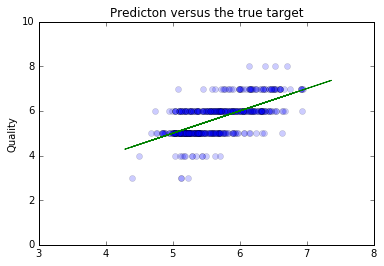

In [10]:
plt.xlim(3, 8)
plt.ylim(0,10)
plt.plot(value_test,t_test,'o', alpha = 0.2)
plt.plot(linreg,linreg)
plt.ylabel('Quality')
plt.title('Predicton versus the true target')
plt.show()

In [11]:
EMS = ((value_test - t_test)**2).mean()
print("The mean squarred error is :",EMS)

The mean squarred error is : 0.390235248522


#### (d) Suggest a benchmark that you could use to decide if this mean squared error value is good

We can compare this mean square error to the mean square error with an other method. One method which can be used is to make the matrix X with the same column but with different factors, with X=[1,x,x^2,x^3...].

#### (e) Implement your benchmark.

In [12]:
def benchmark(column,K) :
    X = np.eye(len(train_data), K)
    for k in range(len(train_data)) :
        X[k][0] = 1
    train_index.sort()
    for k in range(1,K) :
        for line in range(len(train_data)) :
            X[line][k] = train_data[column][train_index[line]]**k
        
    t=np.eye(len(train_data), 1)
    for line in range(len(train_data)):
            t[line][0] = train_data['quality'][train_index[line]]
            
    w_hat = np.linalg.inv((X.transpose()).dot(X)).dot(X.transpose()).dot(t)
    
    linreg = X.dot(w_hat)
    
    X_test = np.eye(len(test_data), K)
    for k in range(len(test_data)) :
        X_test[k][0] = 1
    k=1
    test_index.sort()
    for k in range(1,K) :
        for line in range(len(test_data)) :
            X_test[line][k] = test_data[column][test_index[line]]**k
            
    t_test=np.eye(len(test_data), 1)
    for line in range(len(test_data)):
                t_test[line][0] = test_data['quality'][test_index[line]]
    value_test = X_test.dot(w_hat)
    
    EMS = ((value_test - t_test)**2).mean()
    #print("The mean squarred error is :")
    return EMS

In [13]:
benchmark_value = [min([benchmark(column,k) for k in range(1,6)]) for column in ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']]
b=min(benchmark_value)
print("With the best K and the best column, the mean square error is :",b)

With the best K and the best column, the mean square error is : 0.481972133329


#### (f) Briefly discuss the linear regression performance with respect to the benchmark

Even if we use the best column and the best K, the mean square error of the benchmark is still a lot higher than if we use all the column in the same time - around 20 percent higher in some cases. So the linear regression performance is good compared to my benchmark.

## Exercise 5 - Regularized linear regression
#### (a) Implement regularized least squares and make a plot of the test performance versus the regularization parameter

In [14]:
A = np.eye(12, 12)
A[0][0] = 0
def RLS(l) :
    theta = np.linalg.inv((X.transpose()).dot(X)-l*A).dot(X.transpose()).dot(t)
    value = X_test.dot(theta)
    EMS = ((value - t_test)**2).mean()
    return EMS

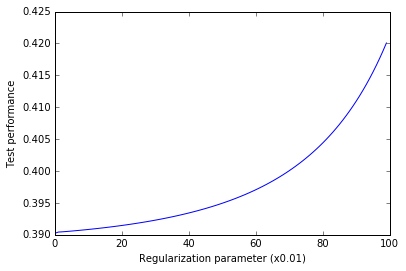

In [15]:
plt.xlabel("Regularization parameter (x0.01)")
plt.ylabel("Test performance")
plt.plot([RLS(0.01*l) for l in range(100)])

#### (b) Describe why this is not a good way of determining the value of the regularization parameter

This is not a good idea because we search it only for one test data, indeed, it would be better to do the same thing with different test and training data. That's why we should do an n-fold CV

####  (c) Implement a 10-fold CV on the training data and use this to determine the value of the regularization parameter. Quote the optimal value, and the performance at this value on the test set

In [16]:
#It splits the train data to allow to take a part as train or test data for the CV
index = [k for k in range(len(train_data))]
random.shuffle(index)
size = int(len(index)/10)
train_split = []
trainCV = []
for k in range (9) :
    split = []
    for r in range(k*size,k*size+size):
        split.append(index[r])
    train_split.append(split)
split = []
for r in range(9*size, len(index)):
    split.append(index[r])
train_split.append(split)

for k in range(10) :
    trainCV.append(train_data.iloc[train_split[k]].sort_index())

In [17]:
# choose_train is the function that chooses which part of the train data will be the train data or the test data for the CV
def choose_train(k) :
    train_datas = []
    test_datas = []
    for r in range(10) :
        if r!=k :
            train_datas = train_datas + train_split[r]
    train_datas.sort()
    test_datas = train_split[k]
    test_datas.sort()
    trainCV = train_data.iloc[train_datas].sort_index()
    testCV = train_data.iloc[test_datas].sort_index()
    return [trainCV,testCV,train_datas,test_datas]
    

In [18]:
#train is the function that create the linear regression on the train data for the CV
def train(k) :
    [train_datas, test_datas, train_indexes,test_indexes] = choose_train(k)
    XCV = np.eye(len(train_datas), 12)
    for k in range(len(train_datas)) :
        XCV[k][0] = 1
    k=0
    
    for j in train_indexes :
        train_indexes[k] = train_datas.iloc[k].name
        k=k+1
    k=1
    for column in train_datas :
        if column != 'quality' :
            for line in range(len(train_datas)):
                XCV[line][k] = train_datas[column][train_indexes[line]]
            k=k+1
                        
    tCV=np.eye(len(train_datas), 1)
    for line in range(len(train_datas)):
            tCV[line][0] = train_datas['quality'][train_indexes[line]]
                        
    w_hatCV = np.linalg.inv((XCV.transpose()).dot(XCV)).dot(XCV.transpose()).dot(tCV)
    
    linregCV = XCV.dot(w_hatCV)
    
    return [linregCV,w_hatCV,XCV,tCV]

In [19]:
#test is the function that computes the data needed from the test data
def test(k) :
    [train_datas, test_datas, train_indexes,test_indexes] = choose_train(k)
    [a,b,c,d] = train(k)
    XCV_test = np.eye(len(test_datas), 12)
    for k in range(len(test_datas)) :
        XCV_test[k][0] = 1
    k=0
    test_indexes2 = []
    for j in test_indexes :
        test_indexes2.append(test_datas.iloc[k].name)
        k=k+1
    k=1
    for column in train_datas :
        if column != 'quality' :
            for line in range(len(test_datas)):
                XCV_test[line][k] = test_datas[column][test_indexes2[line]]
            k = k+1
            
    tCV_test=np.eye(len(test_datas), 1)
    for line in range(len(test_datas)):
                tCV_test[line][0] = test_datas['quality'][test_indexes2[line]]
    value_testCV = XCV_test.dot(b)
    return [XCV_test,tCV_test,value_testCV]

In [20]:
#It stocks the data needed to improve computation time
[linregCV,w_hatCV,XCV,tCV]=[[],[],[],[]]
[XCV_test,tCV_test,value_testCV] = [[],[],[]]
for k in range(10):
    [linregCV1,w_hatCV1,XCV1,tCV1]= train(k)
    [XCV_test1,tCV_test1,value_testCV1] = test(k)
    i=0
    for element in [linregCV,w_hatCV,XCV,tCV,XCV_test,tCV_test,value_testCV] :
        element.append([linregCV1,w_hatCV1,XCV1,tCV1,XCV_test1,tCV_test1,value_testCV1][i])
        i = i+1       

In [21]:
#It computes the mean squared error 
def RLSCV(k,l) :
    #[linregCV,w_hatCV,XCV,tCV] = train(k) 
    #[XCV_test,tCV_test,value_testCV] = test(k)
    theta = np.linalg.inv((XCV[k].transpose()).dot(XCV[k])-l*A).dot(XCV[k].transpose()).dot(tCV[k])
    value = XCV_test[k].dot(theta)
    EMS = ((value - tCV_test[k])**2).mean()
    return EMS

In [22]:
def mean(liste) :
    mean1=0
    for k in range(len(liste)) :
        mean1 = mean1 + liste[k]
    mean1 = mean1/len(liste)
    return mean1

In [23]:
#It computes the mean squarred error for the 10 splits of train data and take the mean for different regularization parameters
RLSCVMean = []
for l in range(1000):
    RLSCVtmp = []
    for k in range(10):
        RLSCVtmp.append(RLSCV(k,0.01*l))
    RLSCVMean.append(mean(RLSCVtmp))      

In [24]:
#plt.plot(RLSCVMean)
#plt.ylim(0,5)

In [25]:
best_l = 0.01*RLSCVMean.index(min(RLSCVMean))
print("The best value is " )
print(best_l)

The best value is 
0.01


#### (d) Compare the performance with the standard linear regression case, discussing possible reasons for any change in performance

In [26]:
print("The value of the mean square error with the standard linear regression is %f" %(EMS))
print("The value of the mean square error with the regularized linear regression is %f" %(RLS(best_l)))
print("The difference between this two values is %f" %(EMS-RLS(best_l)))

The value of the mean square error with the standard linear regression is 0.390235
The value of the mean square error with the regularized linear regression is 0.390430
The difference between this two values is -0.000195


The best regularization parameter is near from zero, that is why their is not a big changement between the standard and the regularized linear regresion. In some cases, the standard method is better than the regularized one. This show an exemple of overfitting : by doing better on the train data, we do worse on the test data.

## Exercise 6 - Classification
#### (a) Describe one limitation of using regression for this particular task?

The regression is good when the information that we need is continuous, however, the quality can only be an integer value, so we can't use the regression in this case, we have to use the classification.

#### (b) Pick either Naive Bayes or KNN. Describe a positive and a negative feature of your classifier with respect to this class. 

I chose KNN. I can use my benchmark to see what are the features that vary like the quality and the ones which have a lower influence on it :

In [27]:
#It allows to found the feature which fit well or bad the quality
a=max(benchmark_value)
b=min(benchmark_value)
print(benchmark_value.index(a))
print(benchmark_value.index(b))

3
10


In almost all the cases, we can see that the "residual sugar" feature is a negative feature, because the quality does not depend a lot on it. Moreover, a positive feature is "alcohol" because the quality depends a lot on it.

#### (c) Describe any data pre-processing that you suggest for this data and your chosen classifier. 

To apply a KNN classification, I need to compute a distance between the different wine, and, to do that, I need all the features to have the same weight - for exemple, the density feature would be disadvantaged a lot if we don't ponderate all the data. With that, I can compute the euclidian distance with the same weight for all the features.

In [28]:
pond = []
k=0
pond_data = pd.read_csv('winequality-red.csv', sep = ';')
for column in train_data :
    if column != 'quality' :
        pond.append(max(pond_data[column]) - min(pond_data[column]))
        pond_data[column] = pond_data[column]/pond[k]
        k=k+1
del pond_data['quality']

#### (d) Implement your classifier and optimize its parameters. Make sure your optimization is clearly commented. Use classification accuracy as your figure of merit 

In [29]:
# Data frame are too long to be read, so I have to work with lists
k=0
pond_data1 = []
for column in pond_data :
    pond_data2 = []
    for l in range(len(pond_data)) :
        pond_data2.append(pond_data[column][l])
    pond_data1.append(pond_data2)
    k += 1

#computation of the euclidian distance :
import math
def eucldistance(i,j) :
    sum = 0
    for column in range(len(pond_data1)) :
            sum = sum + (pond_data1[column][i] - pond_data1[column][j])**2
    #for column in pond_data :
    #    sum = sum + (pond_data[column][i] - pond_data[column][j])**2
    return math.sqrt(sum)   

In [30]:
import time
# found the k nearest neighbors
def KNNfound(i,K) :
    eucl = []
    near = []
    train_index1 = train_index[:]
    for j in train_index :
        eucl.append(eucldistance(i,j))
    eucl1 = eucl[:]
    eucl.sort()
    for k in range(K) : 
        near.append(train_index1[eucl1.index(eucl[k])])
        # this line is to avoid the fact that the same line is taken two times 
        eucl1[eucl1.index(eucl[k])] = 10000
    return near
# found the quality of the k nearest neighbors
def KNNquality(i,K) :
    near = KNNfound(i,K)
    qual = []
    for k in range(K) :
        qual.append(red_wine['quality'][near[k]]) 
    return qual
# found the quality which appear the most
def KNN(i,K) :
    qual = KNNquality(i,K)
    choice = [0,0,0,0,0,0,0,0,0,0,0]
    for k in range(K) :
        choice[qual[k]] += 1
    quality = choice.index(max(choice))
    return quality
# compute the accuracy
def acc() :
    count = 0
    for k in range(len(test_index)) :
        if pred[k] == red_wine['quality'][test_index[k]] :
                   count += 1
    return 100*count/len(test_index)

Now that the computation is done, I have first to optimize the parameters on the train data.
To optimize the parameters, I will make a 10-fold CV on the train data. I can use again trainCV and the function choose_train made in part 5

In [31]:
# found the k nearest neighbors
def KNNfoundCV(i,K) :
    eucl = []
    near = []
    train_indexes1 = []
    train_indexes1 = [train_index[k] for k in train_indexes]
    for j in train_indexes1 :
        eucl.append(eucldistance(i,j))
    for k in range(K) :
        near.append(train_indexes1[eucl.index(min(eucl))])
        eucl[eucl.index(min(eucl))] = 1000
    return near
# found the quality of the k nearest neighbors
def KNNqualityCV(i,K) :
    near = KNNfoundCV(i,K)
    qual = []
    for k in range(K) :
        qual.append(red_wine['quality'][near[k]]) 
    return qual
# found the quality which appear the most
def KNNCV(i,K) :
    qual = KNNqualityCV(i,K)
    choice = [0,0,0,0,0,0,0,0,0,0,0]
    for k in range(K) :
        choice[qual[k]] += 1
    quality = choice.index(max(choice))
    return quality
# compute the accuracy
def accCV() :
    count = 0
    for k in range(len(test_indexes)) :
        if predCV[k] == red_wine['quality'][train_index[test_indexes[k]]] :
                   count += 1
    return 100*count/len(test_indexes)

In [32]:
# make the optimization on the train data
test_index.sort()
K=5
accur = []
for k in range(1,K+1) :
    accu = []
    for l in range(10):
        [train_datas, test_datas, train_indexes,test_indexes] = choose_train(l)
        predCV = []
        for i in [train_index[k] for k in test_indexes] :
            predCV.append(KNNCV(i,k))
        accu.append(accCV())
    accur.append(mean(accu))
    print('With k =',k,', accuracy =',mean(accu),'%') 

With k = 1 , accuracy = 61.204954954954964 %
With k = 2 , accuracy = 56.82432432432434 %
With k = 3 , accuracy = 57.461711711711715 %
With k = 4 , accuracy = 57.358108108108105 %
With k = 5 , accuracy = 58.17567567567568 %


In [33]:
K = accur.index(max(accur)) + 1
print('The best number of neighbor is',K)

The best number of neighbor is 1


In [34]:
# make the classification on the test data
test_index.sort()
pred = []
for l in test_index :
    pred.append(KNN(l,K))
print('With k =',K,', accuracy =',acc(),'%')

With k = 1 , accuracy = 59.791666666666664 %


#### (e) Display the confusion matrix on the text data 

In [35]:
confmat = np.eye(max(t)-min(t)+1)
count = 0
compare = np.eye(len(test_index),2)
for k in range(len(test_index)) :
    compare[k][0]=red_wine['quality'][test_index[k]]
    compare[k][1]= pred[k]
#compare = np.sort(compare,0)
for l in range(int(min(t)),int(max(t))+1) :
    for m in range(int(min(t)),int(max(t)+1)) :
        count = 0
        for k in range(len(compare)):
            if int(compare[k][0]) == l and int(compare[k][1]) == m :
                count += 1
        confmat[l-int(min(t))][m-int(min(t))] = count

In [36]:
print("the confidence matrix is :")
print(confmat)

the confidence matrix is :
[[   0.    2.    2.    0.    0.    0.]
 [   0.    1.    8.    5.    0.    0.]
 [   0.    8.  141.   47.    5.    0.]
 [   0.    3.   58.  112.   21.    0.]
 [   0.    1.    6.   21.   32.    3.]
 [   0.    0.    0.    2.    1.    1.]]


#### (f) Discuss the performance and suggest a way in which they could be improved 

The performance is quite good. Indeed, while the accuracy is not very good (around 60 percent), the predicted quality is almost every time near from the actual quality. As expected in the question 3, the qualities 5,6 and 7 are more easy to find, because we can see in the matrix that we find the good quality in many cases. But this performance is far to be perfect. Indeed, to improve this classification, we could, insteed of choosing the quality which has the more of occurence in the k neighbors, we can divide the chances to choose one quality by the distance to this point. As instance, if, for one wine, the quality of the nearest neighbors is [3,3,2,2,2], and the distance to this neighbors is [0.5,1,2,4,6].With the method that I used, I would choose the quality 2 for the wine, while if I choose the other method, the quality 3 has a score of 1/0.5+1/1 = 3, while the quality 2 has a score of 1/2+1/4+1/6=0.92. The score of the quality 3 is better than the score of 2, so the quality chosen is 3 in this case. An other way to improve the performance could be to ponderate the feateures depending on if they are good or bad features insteed of using the euclidian distance. For example, the "residual sugar" feature would have a weight of 0.5 in the sume while "alcohol" would have 2. So the good features would be more important than the bad features.